# Part II - Prosper Loan Data
## by Edgar Palacios

## Investigation Overview


> The goal of this presentation is to show the genral relationships between variables and defaulted loans along with elucidating unexpected trends that were found.  While most loans that were granted were completed (69%) an interesting observation was made showing that loan holders who defaulted and had higher credit scores also had significantly elevated DTI ratios.  This was unexpected considering that DTI vs Loan status visualization showed all mean DTI ratios below 40% for all loan status categories.  This indicates that the model used to grant loans may be allowing much higher DTI ratios for applicants with higher credit scores than their low credit score counterparts.  


## Dataset Overview

> The dataset explored here is from Propser.  It contains 113,937 loans and 81 attributes including loan information and personal financial information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
df.LoanStatus.replace('Chargedoff','Charged-Off',inplace=True)

In [4]:
ordinal_var_dict = {'CreditGrade': ['AA','A','B','C','D','E','HR'],
                    'ProsperRating (numeric)': [1,2,3,4,5,6,7],
                    'ProsperRating (Alpha)': ['AA','A','B','C','D','E','HR']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [5]:
col_vars = ['Completed','Charged-Off','Defaulted','Cancelled']
status_df = df[df.LoanStatus.isin(col_vars)]

## Distribution of Loan Statuses

> This visualization shows the distribution of the top-four loan status categories by counts. Top-four categories include 'Completed', 'Charged-off', 'Defaulted' and 'Cancelled' from most counts to least - respectively.

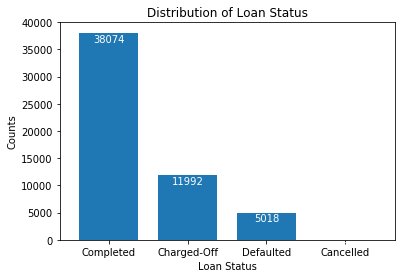

In [6]:
counts = status_df.LoanStatus.value_counts()

status_df.LoanStatus.value_counts().plot(kind='bar', width=.75, 
                                         color = sb.color_palette()[0])
plt.xticks(rotation=0)
plt.xlabel('Loan Status')
plt.ylabel('Counts')
plt.title('Distribution of Loan Status');

# Logic to print value on each bar
for i in range(counts.shape[0]):
    count = counts[i]
    plt.text(i, count-200, count, ha = 'center', va='top', color='w')

## Trends in Credit Grades per Loan Status
> This visualization shows the trends in credit grades for each loan status category.  Completed loans showed a positive correlation with lower credit ratings while  defaulted and charged-off loans showed a negative correlation.

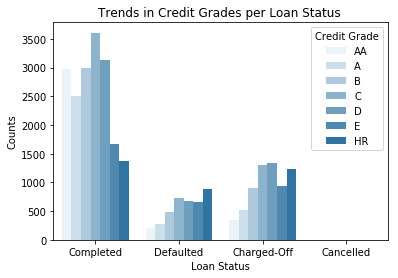

In [7]:
sb.countplot(data=status_df, x='LoanStatus', hue='CreditGrade',
             color=sb.color_palette()[0])
plt.legend(title='Credit Grade',loc=1)
plt.ylabel('Counts')
plt.xlabel('Loan Status')
plt.title('Trends in Credit Grades per Loan Status ');

# Mean Values of DTI Ratios 
> This visualization shows the mean values and confidence intervales of DTI ratio for each loan status category.  Both defaulted and charged-off loans showed debt-to-income ratios above 30% while completed loans were below ~26%.  


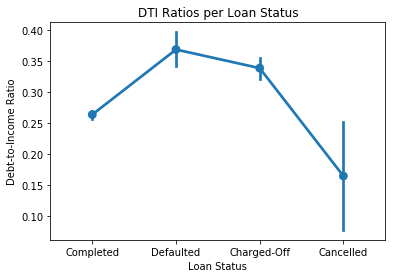

In [8]:
sb.pointplot(data=status_df, x='LoanStatus',y='DebtToIncomeRatio', 
           color = sb.color_palette()[0])
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio')
plt.title('DTI Ratios per Loan Status');

# Trends in DTI Ratio for Credit Grades and Loan Status
> The following visualization shows mean and confidence values for DTI ratios for each credit grade in each loan status category.  No directional trend is observing for completed loan data.  However, a positive correlation is observed for DTI ratios and decreasing credit grade for defaulted and charged off loans.

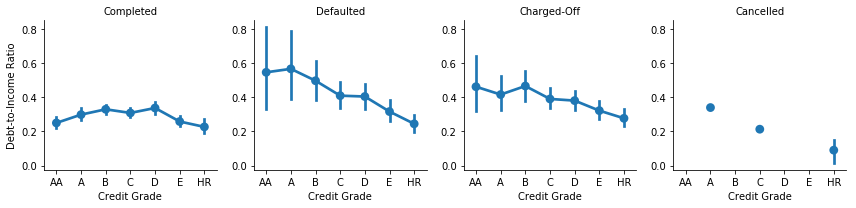

In [9]:
g = sb.FacetGrid(data = status_df, col='LoanStatus', sharey=True)
g.map(sb.pointplot, 'CreditGrade', 'DebtToIncomeRatio')
g.set_titles('{col_name}')
g.set_xlabels('Credit Grade');
g.set_ylabels('Debt-to-Income Ratio');

# Trends in Available Bank Credit
> The following visualization shows mean and confidence values for available bank credit for each credit grade in each loan status category.  As credit grades increase, available bank card credit increases non-linearly.

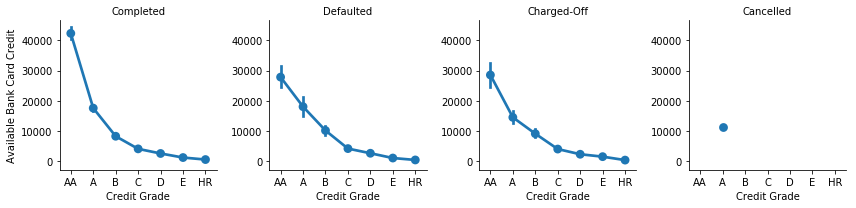

In [10]:
g = sb.FacetGrid(data = status_df, col='LoanStatus', sharey=True)
g.map(sb.pointplot, 'CreditGrade', 'AvailableBankcardCredit')
g.set_titles('{col_name}')
g.set_xlabels('Credit Grade');
g.set_ylabels('Available Bank Card Credit');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [13]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 386682 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 